# Distant Viewing with Deep Learning: Part 1

This tutorial provides a hands-on introduction to the use of deep learning
techniques in the study of large image corpora. The TensorFlow and Keras
libraries within the Python programming language are used to facilitate this
analysis. No prior programming experience is required.

If you are seeing this text, you must have already downloaded Python and the
data files. Currently, you are running an *IPython notebook*. This is a document
that runs Python in your browser and provides space for integrating text (like
this) and code (below!). The format of this tutorial involves a mixture of running
code that we have provided and copying/writing your own code. Let's get started!

## Step 0: Code of conduct

In order for this tutorial to be successful, we ask that participants take note 
of the following guidelines throughout the session:

- This is an interactive workshop, and we expect everyone to follow along with the
tutorial.
- At the same time, please do not work ahead in the tutorial. If you are finished 
with a section ahead of time, you are more than welcome to hack away at our code.
We find that staying together through the tutorial works best for everyone involved.
- Hands on your own computer. Unless otherwise noted, please refrain from writing
code on other's computers. You are more than welcome to explain to your neighbors
what is going on in their notebook, but we want everyone to feel comfortable working
with the code themselves. 

If you have any questions or concerns, please let us know!

## Step 1: Goals

We have a busy tutorial planned for today. At the end, we intend for you to be
comfortable with the following tasks:

- Read images into Python and display them
- Organize a corpus of images and their metadata
- Extract simple numeric features from images and use these to compare images
- Apply pre-constructed neural networks to images in order to detect objects
- Apply pre-constructed neural networks to images to produce more elaborate comparisons
- Detect and identify faces in images
- Build a set of webpages to explore a corpus of images and the above metrics

Depending on our pace, we may not have time to finish all of these tasks, in which
case you should be able to follow along on your own through the files provided.

## Step 2: Running code in an IPython notebook

Below you will see a small snippet of python code. The first line 
prints out a welcome message and the second adds together two numbers.
You can run them by clicking on the code block and hitting the "Run"
button towards the top of this window.

In [ ]:
print("Welcome to Python!")
3 + 7

In [1]:
!pip3 install pandas

  Using cached https://files.pythonhosted.org/packages/27/85/f9e4f0e47a6f1410b1d737b74a1764868e9197e3197a2be843507b505636/pandas-0.23.1.tar.gz
  Running setup.py bdist_wheel for pandas ... done
  Stored in directory: /Users/jgo384/Library/Caches/pip/wheels/af/e7/a0/07e4882052774ad99ce5d91e8756d1210a8a0f5966dfb47a8f
Successfully built pandas


You can edit any of the code in this notebook. After clicking on the block
just type and edit as you would do in any other online form, such as editing
an email. **Change the code above to add together the numbers 3 and 10; rerun
the block to print out the new answer.**

Next, we need to load several python modules that provide functionalities that
will be used throughout this tutorial. We will also set-up some default parameters
that make the graphical output easier to look at. **Make sure you run this block
of code prior to proceeding.**

In [15]:
#!pip3 install matplotlib
#!pip3 install scipy
#!pip3 install Pillow

%pylab inline

import numpy as np
import scipy as sp
import pandas as pd

import os
from os.path import join

    100% |████████████████████████████████| 3.6MB 11.6MB/s ta 0:00:011
Populating the interactive namespace from numpy and matplotlib


In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (8,8)

This should run smoothly if you are using Anaconda Python version 3.5 or higher.
If there are any errors, please raise your hand and let us know as soon as possible.

## Step 3: Python arrays



Much of what we need to do in Python concerning images will involve manipulating
collections of numbers, known as arrays. We will not have time to give a full
introduction to arrays, but here are some of the most important things to keep
in mind.

Here is a one-dimensional array, which is just a linear collection of numbers.

In [17]:
ar = np.array([4, 1, 2, 0, 7, 6, 9, 2, 8, 1, 0, 3])
ar

array([4, 1, 2, 0, 7, 6, 9, 2, 8, 1, 0, 3])

We can access a particular element in the array using a square bracket with the
number of element we want to access. However, Python starts numbering things at
zero. So to get the first element we need to write `ar[0]`:

In [18]:
ar[0]

4

The third element, similarly, can be accessed as:

In [19]:
ar[2]

2

**Write and run the code  in the box below that accesses the 7th element of the array
(which is equal to 9)**

In [20]:
ar[6]

9

Arrays can also be a two-dimensional grid of numbers. For example,
here is an array with three rows and four columns.

In [21]:
ar = np.array([4, 1, 2, 0, 7, 6, 9, 2, 8, 1, 0, 3]).reshape((3,4))
ar

array([[4, 1, 2, 0],
       [7, 6, 9, 2],
       [8, 1, 0, 3]])

To access an element in two dimensions, we need to specify the row number,
a comma, and then the column number. Again, Python starts at zero.

In [22]:
ar[1, 2]

9

Finally, we can access a full row or column by using a colon `:`. It is
interpreted as selecting every row/column. 

In [23]:
print(ar[0, :])
print(ar[:, 2])

[4 1 2 0]
[2 9 0]


Being familiar with this notation will be useful in the following code snippets, but
you will not be required to write any array-based code from scratch so do not worry
if this notation is new to you.

## Step 4: Images in Python

We are now ready to read images into Python. We have several corpora that we
will be working on in a few minutes, but for now let's just read in a test
image I took of a teapot in my kitchen at home. To do this, we need to tell
Python where the image is (its in a directory called 'test', which is inside
a directory called 'images' and the file is called 'teapot.jpg'). Once we have
the filename, we can read in the image into Python with the function `imread`
as follows:

In [24]:
img = imread(join("images", "test", "teapot.jpg"))

There is now an object in python called `img` that contains all of the data that
describes my image of a teapot. We can have Python print the image itself by 
calling the function `plt.imshow` on the image, as follows:

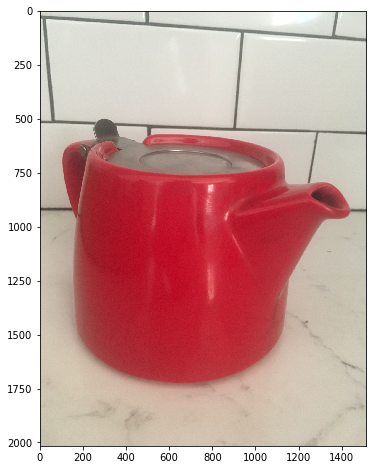

In [25]:
plt.imshow(img)

It may not look like much, but trust me, it makes delicious tea.

How exactly is Python storing the teapot image? Understanding the
internal structure of an image object will be very important for
today's tutorial. We can get some idea by looking at the `shape`
property of the image object

In [26]:
img.shape

(2016, 1512, 3)

It turns out that Python stores images as an array of numbers, but here the
array has three dimensions. We can think of it as storing color images as
three grids of numbers. These numbers tell Python the degree to which each
pixel should be represented by red, green, and blue light. The shape above
tells us that the image is 2016 pixels high and 1512 pixels wide. The third
number reminds us that the image contains red, green, and blue pixels.

We can print out the actual numbers in the image object, though looking at all
of the numbers would be overwhelming. Let's took a slice of the `img` object
from 1000-1010 vertical axis and 600-610 on the horizontal axis.

In [27]:
print("Red:")
print(img[1000:1010, 600:610, 0])

print("Green:")
print(img[1000:1010, 600:610, 1])

print("Blue:")
print(img[1000:1010, 600:610, 2])

Red:
[[198 199 199 197 195 196 196 194 194 198]
 [193 195 191 192 198 196 193 198 198 200]
 [196 192 192 196 197 193 191 194 199 199]
 [195 193 196 198 195 192 191 191 191 193]
 [186 194 195 192 195 194 193 197 191 192]
 [190 195 194 191 193 196 197 200 197 193]
 [198 192 191 194 195 196 197 196 194 193]
 [197 189 183 192 202 198 192 196 193 195]
 [190 195 192 190 195 194 189 190 188 193]
 [191 195 195 192 190 188 188 188 189 191]]
Green:
[[21 22 22 20 18 19 19 17 17 21]
 [16 18 14 15 21 19 16 21 21 23]
 [19 15 15 19 20 16 14 17 22 22]
 [18 16 19 21 18 15 14 14 14 16]
 [ 9 17 18 15 18 17 16 20 14 15]
 [13 18 17 14 16 19 20 23 20 16]
 [24 15 14 17 18 19 20 19 17 16]
 [23 12  6 15 25 21 15 19 16 18]
 [16 21 18 16 21 22 17 18 14 19]
 [17 21 21 18 16 16 16 16 15 17]]
Blue:
[[49 50 48 46 44 45 45 43 43 47]
 [44 46 40 41 47 45 42 47 47 49]
 [47 41 41 45 46 42 40 43 48 48]
 [44 42 45 47 44 41 40 40 40 42]
 [35 43 44 41 44 43 42 46 40 41]
 [39 44 43 40 42 45 46 49 46 42]
 [49 41 40 43 44 45 46

The numbers in the image object range from 0 to 255. The higher the number the more
that color shows up in a given pixel. If all three colors are 255 that would lead to
a white pixel; all three equal to 0 gives a black pixel. 

Above, we see that the red pixels are larger than the green and blue. Does this make
sense given the image of my teapot and the part of the image that we selected above?

**Your turn.** Read in a similar photograph I took a bottle of Dickel Rye whiskey. 
Dickely Rye is an excellent alternative to tea in the evening hours, particularly
if you are trying to avoid caffeine.

In [ ]:
img = imread(join("images", "test", "dickel.jpg"))

In the code block below, **write and execute the code to plot the new image**.

Copy and re-run the code we used to see the amount of red, green, and blue pixels used
in the middle of the photo.

Which color is the most dominant? Is it the one you would expect. How do
these colors compare to the ones we saw for the teapot image?

## Step 5: Describing images numerically

As we saw, images in Python are represented by large tables of numbers. However, the
values for an individual pixel are not particularly meaningful. It is only the image
as a whole that holds a larger meaning to us. At the heart of this tutorial is finding
ways to bridge the gap between numeric data and visual meaning. As a warning going 
forward: this is not an easy or entirely solved process, so do not get discourage by
our first few attempts.

We have already seen that we can make some sense of an image by looking at the relative
amount of red, green, and blue pixels that it uses. We can't look at every single pixel,
however. Another strategy would be to take the average of the three color channels. 
Reading the teapot image back in, we can see this with the following code:

In [ ]:
img = imread(join("images", "test", "teapot.jpg"))

print("\nRed mean:")
print(np.mean(img[:, :, 0]))
        
print("\nGreen mean:")
print(np.mean(img[:, :, 1]))
        
print("\nBlue mean:")
print(np.mean(img[:, :, 2]))

Again, we see that this shows that the teapot has a lot of the color
red. How does this work for the bottle of Rye whiskey.

In [ ]:
img = imread(join("images", "test", "dickel.jpg"))

print("\nRed mean:")
print(np.mean(img[:, :, 0]))
        
print("\nGreen mean:")
print(np.mean(img[:, :, 1]))
        
print("\nBlue mean:")
print(np.mean(img[:, :, 2]))

Here, the amount of red has decreased and the amount of green has increased. However, we
see that there is still a lot of all three colors here. Why is that? For one thing, the
image has a lot of white in the background and all three colors need to light up for this
to be visible. Because of this, the absolute intensity of each pixel is often not very
useful on its own.

As an alternative, let's compute a new table of numbers `img_maxcol` showing the maximum
value of all the intensities for a given pixel. Similarly, we will compute `img_mincol`
as the minimum color intensity for a pixel. Notice that these have the same number of row
and columns as the original image

In [ ]:
img = imread(join("images", "test", "teapot.jpg"))

img_maxcol = np.amax(img, 2)
img_mincol = np.amin(img, 2)
print(img_maxcol.shape)
print(img_mincol.shape)

We can define a quantity called the *saturation*, which measures the richness of a color,
as the difference between the maximum and minimum pixel intensities divided by the maximum
intensitiy. Applying this to teapot:

In [ ]:
img_sat = (img_maxcol - img_mincol) / img_maxcol
plt.imshow(img_sat, cmap='gray')

Shows that the image is highly saturated on the body of the pot, but not very
saturated in the white background. These should seem sensible when thinking 
about the definition we used for saturation. Let's also compute the mean saturation
of the image as we did for the average value of the pixel intensities.

In [ ]:
np.mean(img_sat)

We will see in the next section that the average saturation is a reasonable measurement for
comparing images.

## Step 6: Working with image corpora

It is now time to start working with the large collections of images that we have
gathered. We will start working together on the corpus of paintings. You'll have
a chance to work with the other collections shortly.

To start, we will load a metadata table with information about each of the images 
in the corpus. Run the following line and scroll through the images to get a sense
of the collection and the available metadata.

In [ ]:
wikiart = pd.read_csv("meta/wikiart.csv")
wikiart.head()

We can read in an image in the corpus and print it, just as we did with the test images.
Here, we will load the 201st image in the corpus and print the image itself. We will also
print out the metadata about the image.

In [ ]:
img_path = join('images', 'wikiart', wikiart['filename'][200])
print(wikiart.iloc[200])

img = imread(img_path)
plt.imshow(img)

Copy the code from the block above, and select a different image from the corpus. There
are 645 images, so select any number from 0 to 644.

Now its time to do something with the entire corpus together. We will add two
new columns to the dataset called `red` and `saturation`. For each image, we
will record the average intensity of these two measurements.

To fill these values in for each image, we will make use of a `for` loop. Within
the loop, we simply apply the code we have used above to compute the red and
saturation values. This might take a minutes or two to finish.

In [ ]:
red = np.zeros(wikiart.shape[0])
sat = np.zeros(wikiart.shape[0])

for index, row in wikiart.iterrows():
    img_path = join('images', 'wikiart', row['filename'])
    img = imread(img_path)
    img_maxcol = np.amax(img, 2)
    img_maxcol[img_maxcol == 0] = 1
    img_mincol = np.amin(img, 2)
    img_sat = (img_maxcol - img_mincol) / img_maxcol
    
    red[index] = np.mean(img[:, :, 0])
    sat[index] = np.mean(img_sat) 
    if index % 100 == 0:
        print("Done with {0:d}".format(index))

    
wikiart["red"] = red
wikiart["saturation"] = sat

We can see that these have been added to the dataset `wikiart` by printing it
out once again.

In [ ]:
wikiart.head()

## Step 7: Visualizing 

We have done all of this work in order to produce metrics that describe the images
in a way that allows us to visualize the corpus. We want, in this case, to organize
images such that those with a similar usage of red and saturation are grouped together.

For example, take the saturation and red values of each image colored by painter.

In [ ]:
plt.figure(figsize=(10, 14))

cmap = {'Morisot Berthe': 'olive', 'Rivera Diego': 'pink', 'Monet Claude': 'navy'}
wikiart.plot(x='red', y='saturation', kind='scatter', 
             color=[cmap.get(c, 'black') for c in wikiart.artist])

Do you see any interesting patterns here?

Another thing that we can do is to look at images that have the lowest saturation
and see how these relate to one another

In [ ]:
plt.figure(figsize=(14, 14))

sat_index = np.argsort(wikiart['saturation']).tolist()
for ind, i in enumerate(sat_index[:24]):
    try:
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
        plt.subplot(4, 6, ind + 1)

        img_path = join('images', 'wikiart', wikiart.iloc[i]['filename'])
        img = imread(img_path)
        plt.imshow(img)
        plt.axis("off")
    except:
        pass

Similarly, let's redo this but take those images with the highest saturation.

In [ ]:
plt.figure(figsize=(14, 14))

sat_index = np.argsort(wikiart['saturation']).tolist()
for ind, i in enumerate(sat_index[-24:]):
    try:
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
        plt.subplot(4, 6, ind + 1)

        img_path = join('images', 'wikiart', wikiart.iloc[i]['filename'])
        img = imread(img_path)
        plt.imshow(img)
        plt.axis("off")
    except:
        pass

How would you categorize the differences between the images in the high and low
saturation groups? Does this metric seem to cluster together, at least on the
extreme, similar images?

Now let's take a particular image and show all of the other images with a similar
saturation. Here, we are using the top-left image as a starting point and finding
the 23 other images that are most similar to it by saturation.

In [ ]:
plt.figure(figsize=(14, 14))

X = np.array(wikiart['saturation'].tolist()).reshape((wikiart.shape[0],1))

idx = np.argsort(np.abs(X - X[1, :]).flatten())[:24]

for ind, i in enumerate(idx):
    try:
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
        plt.subplot(4, 6, ind + 1)

        img_path = join('images', 'wikiart', wikiart.iloc[i]['filename'])
        img = imread(img_path)
        plt.imshow(img)
        plt.axis("off")
    except:
        pass

For the most part, these images are not particularly similar in any consistent way. 
Saturation is a good similarity score at its extreme values (white, faded backgrounds
on one end and bright murals on the other). It is not a great general purpose measurement.
We need a more complex measurement!

**Copy the code above, but use a different starting image.** Do the recommendations for this
image look better, worse, or about the same as the those for the image we used above?

## (optional) Step 8: FSA-OWI Photographs 

The set of data in this repository contains three sets of image corpora. One nice
aspect of the code we have introduced is that it can be easily adapted to work with
another set of images stored in a similar format. Here, we will look at a subset of
the FSA-OWI collection.

Find and modify the appropriate code above to read in the `fsa_owi.csv` file. Copy it below,
read in the dataset, and look at the head of the table.

In the code block below, print out the 100th image in the FSA-OWI corpus:

Most of the FSA-OWI images are in black and white. This means that the red, blue, and green
pixel intensites are all the same. High values are more white and low values are more black.
Cycle over the corpus and add a measurement of the red pixel intensities to the dataset.

Write and execute the code to display the 24 images that are the darkest, that is, they have
the lowest average red pixel intensity.

Repeat with the lightest images, those with the highest average red intensity.

How well does the average pixel intensity cluster similar images together at the extreme values?